# Implementing Multiple linear regression model for student dataset
- Predict writing skill of student based on the math skill and reading skill of the student using the **Gradient descent method**.
- Find out **R^2 score** for the predicted model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> # Understanding the data

In [2]:
# Loading data
data = pd.read_csv('/content/drive/MyDrive/AIML_datasets/student.csv')
print(data.shape)
data.head()


(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


- **Dataset:** Contains 3 columns: Math, Reading, and Writing, representing scores in these subjects. Each row corresponds to a student.

- **data.shape:** Outputs (1000, 3), indicating the dataset has 1000 rows and 3 columns.

- **data.head():** Displays the first few rows for inspection.

> # Extracting Features and Target Variables

In [3]:
# Extracting individual scores
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values


- **math and read:** Independent variables (features).

- **write:** Dependent variable (target).

> # Visualizing Data (3D Scatter Plot)

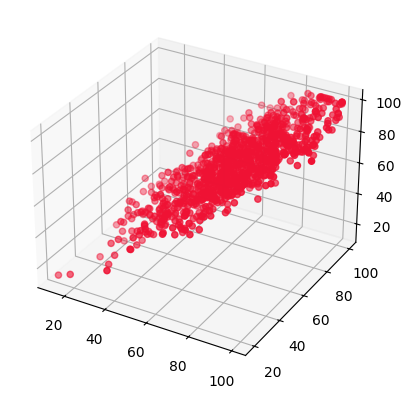

In [6]:
# Ploting the scores as scatter plot
# fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(math, read, write, color='#ef1234')
plt.show()


> # What is Gradient Descent?

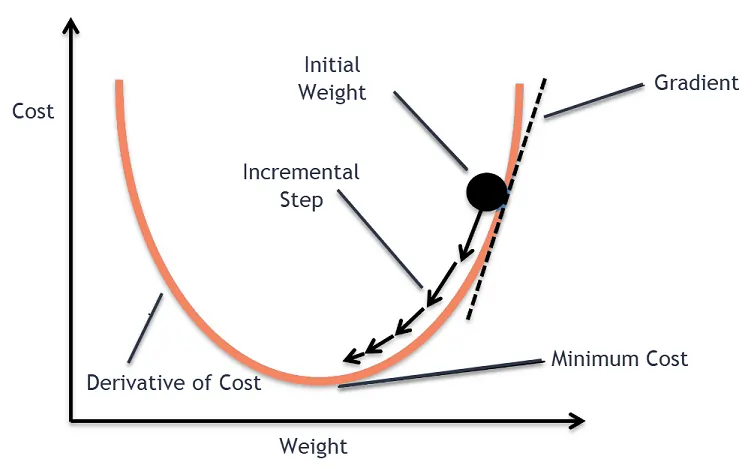

> # Preparing Data for Gradient Descent

In [ ]:
# Preparing feature matrix and target vector
m = len(math)  # Number of samples
x0 = np.ones(m)  # Intercept column
X = np.array([x0, math, read]).T  # Feature matrix
B = np.array([0, 0, 0])  # Initial coefficients
Y = np.array(write)  # Target variable
alpha = 0.0001  # Learning rate


**Intercept Term (x0):** Adds a column of ones to account for the bias term in linear regression.

**Feature Matrix (X):** Combines x0, math, and read into a single 2D array where:

- Rows = data points.

- Columns = features (bias, math, reading).

**Coefficients (B):** Initialized to zeros; they will be optimized using gradient descent.

**Target Variable (Y):** write scores as a 1D array.

**Learning Rate (alpha):** Small value (0.0001) to control the step size during gradient descent.


In [ ]:
# Cost function
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2) / (2 * m)
    return J

# Calculating initial cost
initial_cost = cost_function(X, Y, B)
print("Initial Cost")
print(initial_cost)


Initial Cost
2470.11


In [ ]:
# Gradient descent function
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        # Hypothesis values
        h = X.dot(B)
        # Difference between hypothesis and actual Y
        loss = h - Y
        # Gradient calculation
        gradient = X.T.dot(loss) / m
        # Updating coefficients
        B = B - alpha * gradient
        # Calculating new cost
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history


In [ ]:
# Running gradient descent for 100,000 iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# Displaying results
print("New Coefficients")
print(newB)
print("Final Cost")
print(cost_history[-1])


New Coefficients
[-0.47889172  0.09137252  0.90144884]
Final Cost
10.475123473539169


In [ ]:
# Root Mean Square Error (RMSE)
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


In [ ]:
# Predictions
Y_pred = X.dot(newB)

# R2 Score
print("R2 Score")
print(r2_score(Y, Y_pred))


R2 Score
0.9097223273061553
